### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.manifold import TSNE

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
data = boston.data

In [7]:
feature_names = boston.feature_names

In [8]:
X = pd.DataFrame(data, columns=feature_names)

In [9]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.4 KB


In [11]:
price = boston.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)

In [17]:
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [19]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [20]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [21]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [22]:
X_train_tsne[:5, :]

array([[ 17.645624 ,  28.406218 ],
       [  1.6133794, -11.563689 ],
       [-14.5985   , -16.157717 ],
       [ 27.65398  ,  24.220755 ],
       [  3.8739002,  -9.40449  ]], dtype=float32)

In [23]:
X_train_tsne.shape

(404, 2)

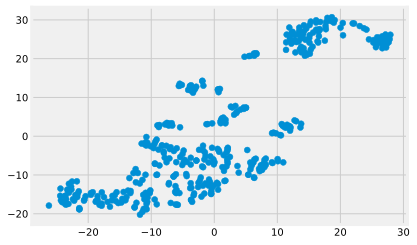

In [24]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1]);

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=3)

In [27]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [28]:
pd.value_counts(labels_train)

1    191
2    128
0     85
dtype: int64

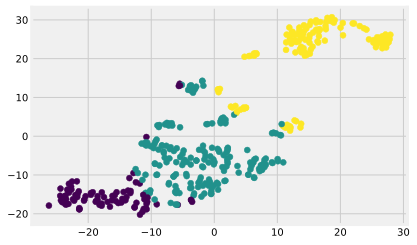

In [29]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train);

In [30]:
crim_train = X_train['CRIM'].squeeze()

In [31]:
type(y_train)

numpy.ndarray

In [32]:
y_train.mean(), crim_train.mean()

(22.796534653465343, 3.609124628712873)

In [33]:
y_train[labels_train == 0].mean(), crim_train[labels_train == 0].mean()

(27.87411764705882, 0.0721184705882353)

In [34]:
y_train[labels_train == 1].mean(), crim_train[labels_train == 1].mean()

(24.971204188481675, 0.42098554973821983)

In [35]:
y_train[labels_train == 2].mean(), crim_train[labels_train == 2].mean()

(16.1796875, 10.715219062500003)

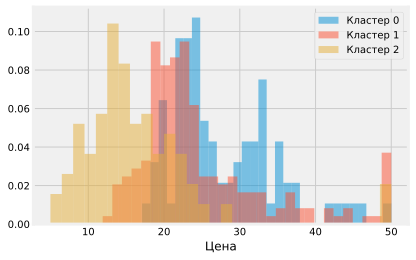

In [36]:
plt.hist(y_train[labels_train == 0], bins=30, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=30, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=30, density=True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена');

### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [37]:
labels_test = kmeans.predict(X_test_scaled)

In [38]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

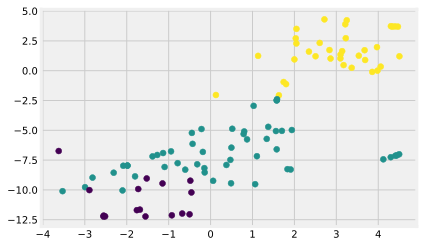

In [39]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test);

In [40]:
crim_test = X_test['CRIM'].squeeze()

In [41]:
y_test.mean(), crim_test.mean()

(21.488235294117644, 3.630946764705883)

In [42]:
y_test[labels_test == 0].mean(), crim_test[labels_test == 0].mean()

(31.35, 0.062060000000000004)

In [43]:
y_test[labels_test == 1].mean(), crim_test[labels_test == 1].mean()

(21.860784313725492, 0.26607882352941176)

In [44]:
y_test[labels_test == 2].mean(), crim_test[labels_test == 2].mean()

(16.43714285714286, 10.165531142857143)